In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the clean airbnb data file

df = pd.read_csv("listings_clean.csv", na_values=' ')
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,49091,COZICOMFORT LONG TERM STAY ROOM 2,266763,Francesca,North Region,Woodlands,1.44255,103.79580,Private room,83,180,1,2013-10-21,0.01,2,365
1,50646,Pleasant Room along Bukit Timah,227796,Sujatha,Central Region,Bukit Timah,1.33235,103.78521,Private room,81,90,18,2014-12-26,0.28,1,365
2,56334,COZICOMFORT,266763,Francesca,North Region,Woodlands,1.44246,103.79667,Private room,69,6,20,2015-10-01,0.20,2,365
3,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,East Region,Tampines,1.34541,103.95712,Private room,206,1,14,2019-08-11,0.15,9,353
4,71896,B&B Room 1 near Airport & EXPO,367042,Belinda,East Region,Tampines,1.34567,103.95963,Private room,94,1,22,2019-07-28,0.22,9,355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3529,37619286,Double Pod Capsule in Mixed Dorm,87731750,Gap Year,Central Region,Kallang,1.31505,103.86022,Shared room,56,1,1,2019-08-13,1.00,8,121
3530,37690516,cozy Condominium in quite neighbourhoods,165475492,BOONChean,Central Region,Toa Payoh,1.34063,103.88219,Private room,60,1,1,2019-08-12,1.00,1,1
3531,37798739,near Clementi MRT female only,157856583,Elyssa,West Region,Clementi,1.30677,103.76224,Private room,56,1,1,2019-08-17,1.00,1,120
3532,37841266,Sunny Modern Condo in City Center walk to MRT,39207304,Sophie,Central Region,Rochor,1.30074,103.84742,Entire home/apt,237,7,1,2019-08-25,1.00,12,159


In [3]:
# Display the dataframe info()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3534 entries, 0 to 3533
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              3534 non-null   int64  
 1   name                            3534 non-null   object 
 2   host_id                         3534 non-null   int64  
 3   host_name                       3534 non-null   object 
 4   neighbourhood_group             3534 non-null   object 
 5   neighbourhood                   3534 non-null   object 
 6   latitude                        3534 non-null   float64
 7   longitude                       3534 non-null   float64
 8   room_type                       3534 non-null   object 
 9   price                           3534 non-null   int64  
 10  minimum_nights                  3534 non-null   int64  
 11  number_of_reviews               3534 non-null   int64  
 12  last_review                     35

# Visual Analysis -
For all my visual analysis, I am using seaborn

### 1. Aibnb Singapore region analysis

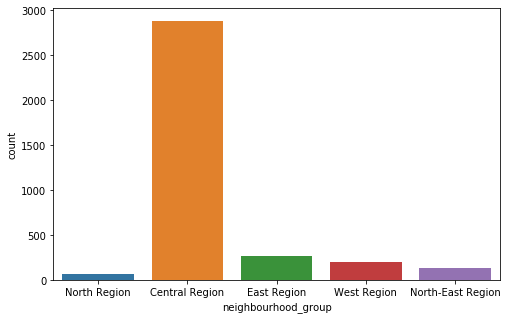

In [4]:
# plotting the number of airbnb in each region

fig,ax = plt.subplots(figsize=(8,5))
sns.countplot(df['neighbourhood_group'])

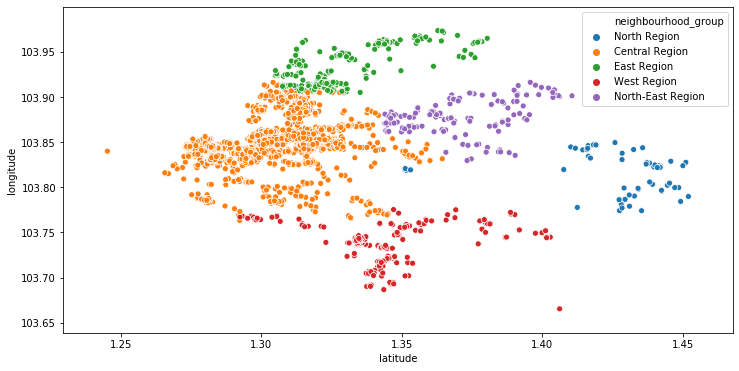

In [5]:
# Plotting a scatter plot using latitude & longitude and group by the neighbourhood_group

fig, ax = plt.subplots(figsize=(12,6))
ax = sns.scatterplot(x = "latitude", y="longitude", hue="neighbourhood_group", data=df)

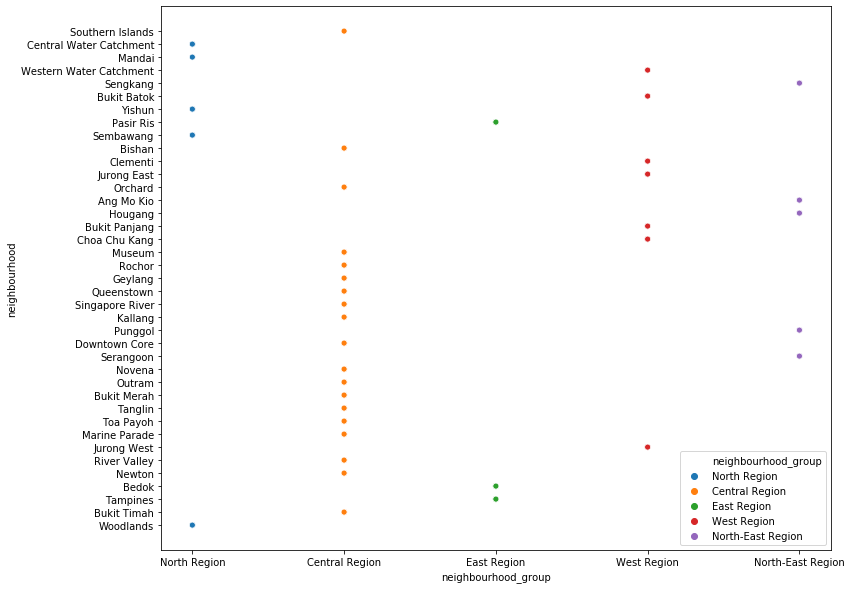

In [6]:
# Plotting to analyse the neighbourhood in each region

fig, ax = plt.subplots(figsize=(12,10))
ax = sns.scatterplot(x = "neighbourhood_group", y="neighbourhood", hue="neighbourhood_group", data=df)

### 2. Price comparison  

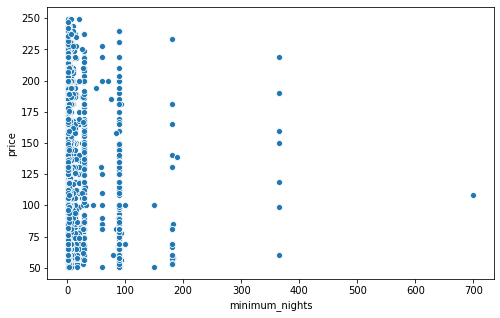

In [8]:
# plotting price for minimum nights

fig,ax = plt.subplots(figsize=(8,5))
ax = sns.scatterplot(x="minimum_nights", y="price", data=df)

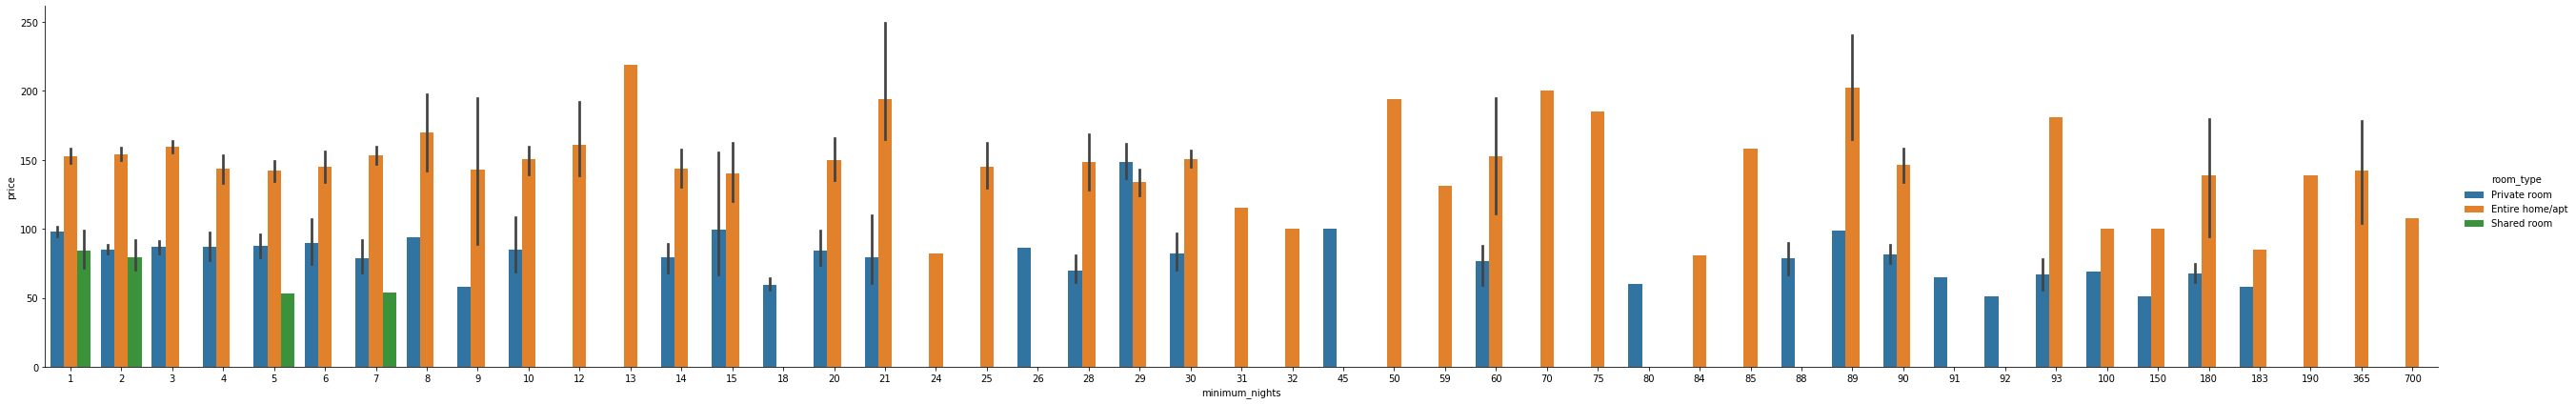

In [9]:
# Price of rooms for minimum nights

sns.catplot(x="minimum_nights", y="price", hue="room_type", kind="bar", data=df, height=6, aspect=6)
plt.savefig('123.png')

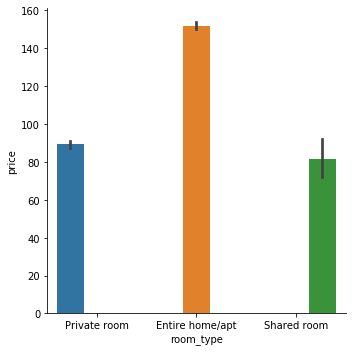

In [10]:
# price range for each room type

sns.catplot(x="room_type", y="price", hue="room_type", kind="bar", data=df)

### 3. Analying most booked rooms

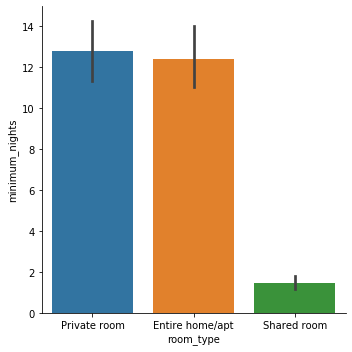

In [11]:
# Plotting room type vs minimum nights

sns.catplot(x="room_type", y="minimum_nights", kind="bar", data=df)

### 4. Review Analysis

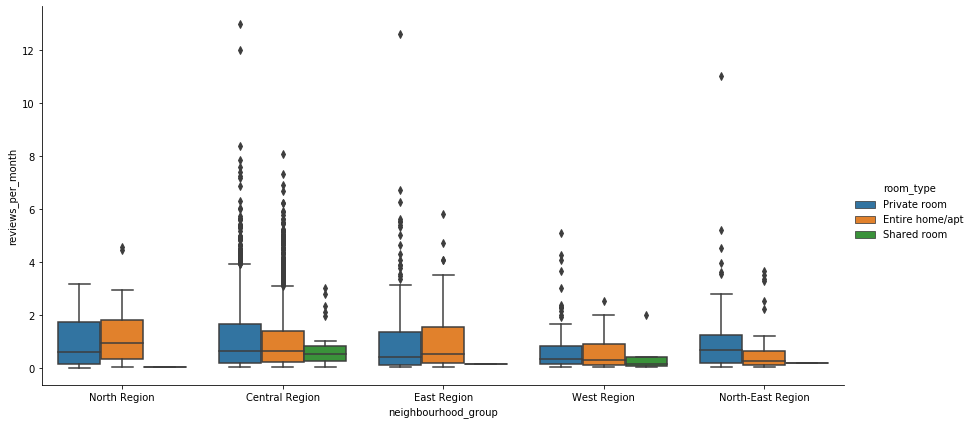

In [12]:
# Plotting a box plot to analyse the reviews per month for the room type and neighbourhood group

sns.catplot(x="neighbourhood_group", y="reviews_per_month", hue="room_type", kind="box", data=df, height=6, aspect=2)

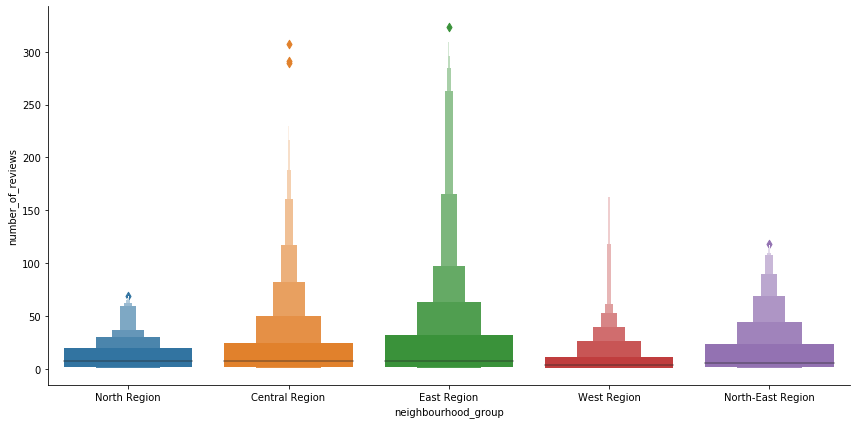

In [13]:
# box plot to analyse the number of reviews for each region

sns.catplot(x="neighbourhood_group", y="number_of_reviews", kind="boxen", data=df, height=6, aspect=2)

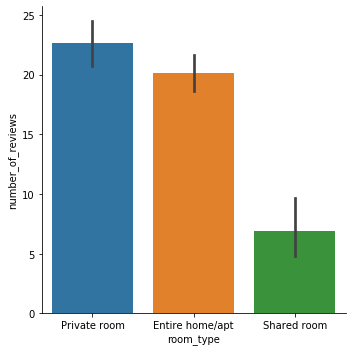

In [14]:
# bar plot to analyse the number of reviews for each room type

sns.catplot(x="room_type", y="number_of_reviews", kind="bar", data=df)

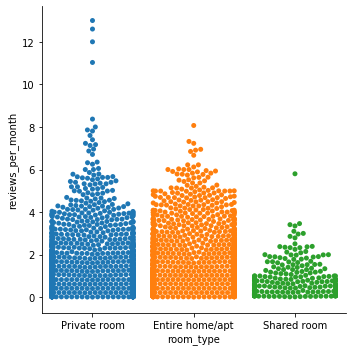

In [67]:
# Plotting the reviwes per month for the room type

sns.catplot(x="room_type", y="reviews_per_month", kind="swarm", data=df)

### 5. Airbnb Occupancy

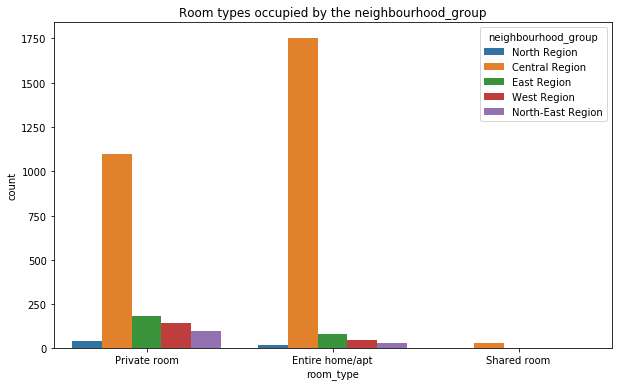

In [15]:
plt.figure(figsize=(10,6))
sns.countplot(x = "room_type", hue = "neighbourhood_group", data = df)
plt.title("Room types occupied by the neighbourhood_group")
plt.show()

### 6. Heat Map

In [16]:
# Import library

import folium

In [17]:
# Defining a function to generate the base map of Singapore

def generateBaseMap(default_location=[1.28967, 103.85007], default_zoom_start=11):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

In [18]:
# print the base map

base_map =  generateBaseMap()
base_map

In [19]:
# generate heat map using the function, latitute & longitude columns from the dataset

from folium.plugins import HeatMap
base_map = generateBaseMap()
HeatMap(data=df[['latitude', 'longitude']].groupby(['latitude', 'longitude']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(base_map)
base_map